## Observations and Insights 

In [118]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "/Users/kristybao/Desktop/Matplotlib/Mouse_metadata.csv"
study_results_path = "/Users/kristybao/Desktop/Matplotlib/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


print (mouse_metadata.head())
print (study_results.head())


# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_df.head()

  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
#Sort merged database by Tumor Volume(mm3)
merged_sort_df = merged_df.sort_values (["Tumor Volume (mm3)"])
merged_sort_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1


## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_gp = merged_sort_df.groupby(["Drug Regimen"])
regimen_gp


# This method is the most straighforward, creating multiple series and putting them all together at the end.

regimen_mean = regimen_gp ["Tumor Volume (mm3)"].mean()
regimen_mean

regimen_median = regimen_gp ["Tumor Volume (mm3)"].median()
regimen_median

regimen_var = regimen_gp ["Tumor Volume (mm3)"].var()
regimen_var

regimen_std = regimen_gp ["Tumor Volume (mm3)"].std()
regimen_std

regimen_SEM = regimen_gp ["Tumor Volume (mm3)"].sem()
regimen_SEM



Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary = pd.DataFrame({"Mean":regimen_mean,"Median":regimen_median,"Variance":regimen_var,"Standard Deviation":regimen_std,"SEM":regimen_SEM})
summary

# This method produces everything in a single groupby function
regimen_dp = merged_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_dp


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

## Bar and Pie Charts

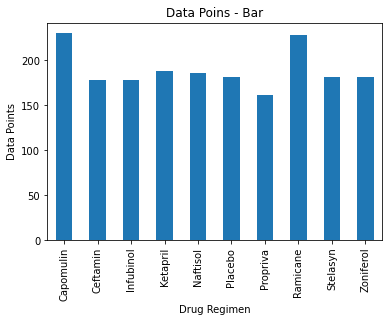

In [39]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
regimen_dp.plot(kind="bar")

plt.title("Data Poins - Bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

plt.show()

Text(0, 0.5, 'Data Points')

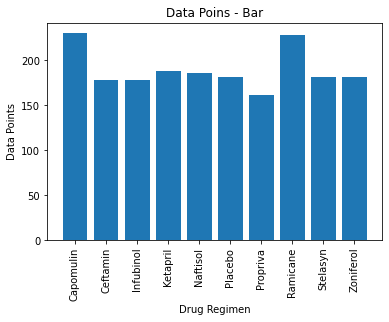

In [48]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

MID = [230,178,178,188,186,181,161,228,181,182]

x_axis = np.arange(len(regimen_dp))
plt.bar (x_axis,MID)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
, rotation='vertical')
           
plt.title("Data Poins - Bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gp_gender = merged_df.groupby(["Mouse ID","Sex"])
gp_gender.head

mouse_gender_df = pd.DataFrame(gp_gender.size())
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

mouse_gender["% of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))
mouse_gender["% of Sex"] = mouse_gender["% of Sex"]

mouse_gender




,Total Count,% of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


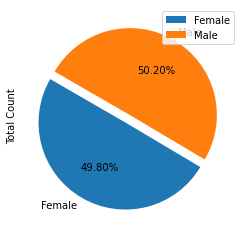

In [71]:
#Pie plot

plot = mouse_gender.plot.pie(y='Total Count', startangle = 150, explode = (0.1,0), autopct="%1.2f%%")

(-1.1894827947668685,
 1.1132657633296064,
 -1.2269942187241725,
 1.1151032943147776)

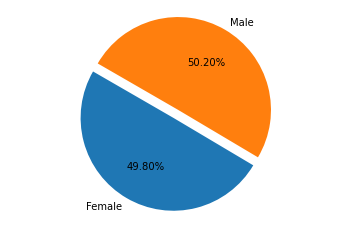

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]

#List the values
sizes = [49.799197,50.200803]

#Pie chart 
plt.pie(sizes, explode = (0.1,0), labels=labels, autopct="%1.2f%%", startangle=150)

#Set equal axis
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [78]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

fin_regimes = merged_df[merged_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
fin_regimes = fin_regimes.sort_values(["Timepoint"])
fin_regimes

best_regimes_data = fin_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

best_regimes_data


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [82]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds


best_regimens_sort = best_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best_regimens_sort.head()

# Turn retrieved data into dataframe to easily manipulate
best_regimen_df = best_regimens_sort.to_frame()
best_regimen_df

#Create a list to use as labels and dataframe
top4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

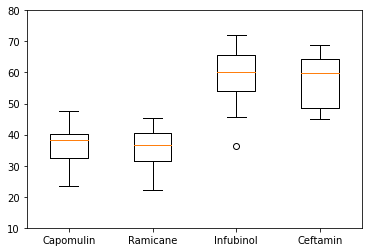

In [87]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = best_regimen_df.reset_index()

tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]

plt.boxplot(tumor_vols, labels=top4)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

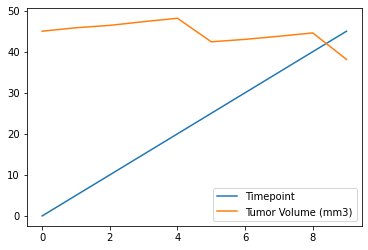

In [133]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_vs_tumer = merged_df[merged_df["Mouse ID"].isin(["j119"])]
time_vs_tumer

time_vs_tumer_data = time_vs_tumer[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumer_data

line_plot_df = time_vs_tumer_data.reset_index()
line_plot_df

line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final

lines = line_plot_final.plot.line()

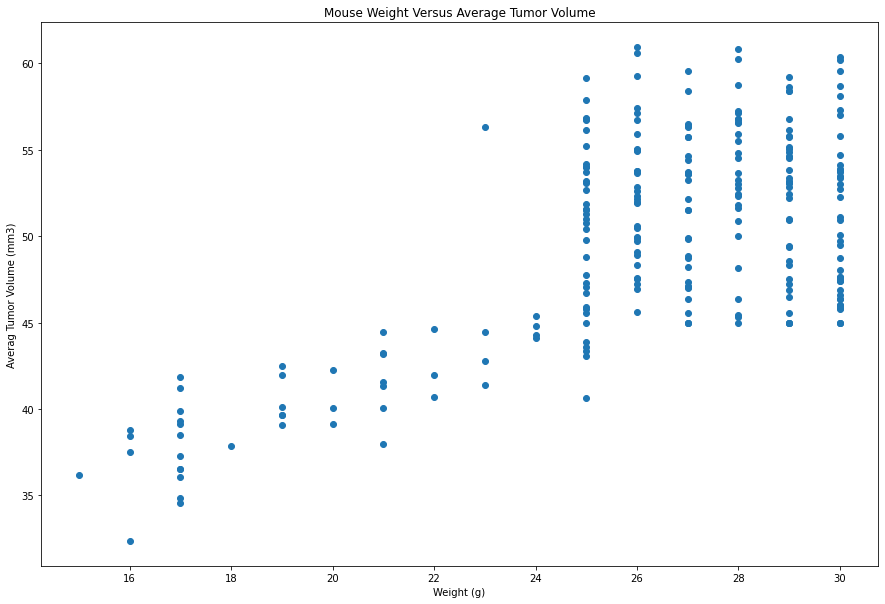

In [136]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

fig1, ax1 = plt.subplots(figsize=(15, 10))
avg_capm_vol =merged_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

In [140]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.66


In [141]:
x_values = avg_capm_vol['Weight (g)']
y_values = avg_capm_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

y = 1.1x + 21.02


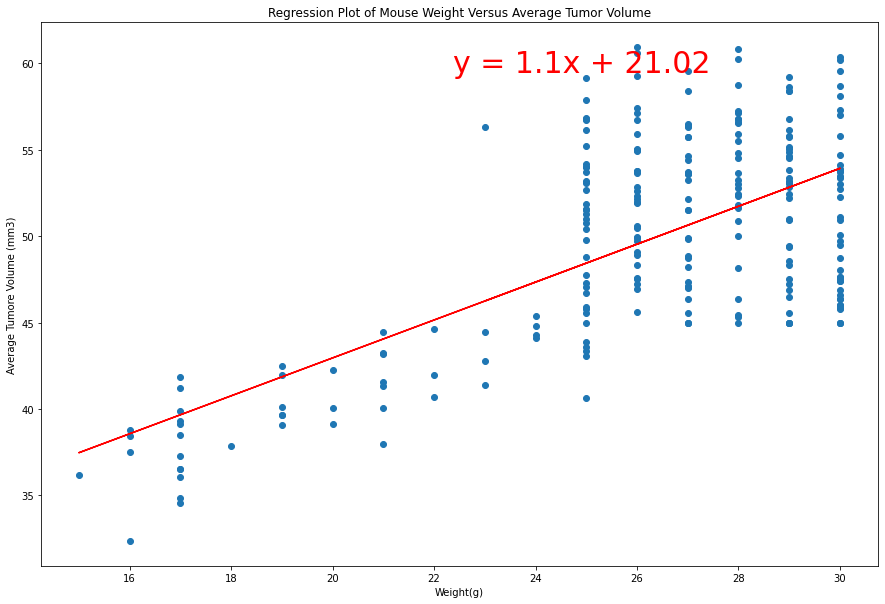

In [148]:
# Add the linear regression equation and line to plot
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot of Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

plt.show()
